#**Cirrhosis Disease Stage Classification**

#**BLUF** (Bottom Line Up Front)

Overall, the best classifier appears to be the PyCaret Low-Code Classifier since it is reporting the highest accuracy for almost all of the parts. However, in terms of adding in Standardization, the PyCaret Low-Code Classifier does worse, the best model for that is the Light GBM Classifier.


#**Business Problem**

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

A classfier is needed to predict whether a patient will suffer from cirrhosis or not?

![cirr info](https://preferredresearchpartners.com/build/wp-content/uploads/2017/11/Cirrhosis-fact-sheet-PRP.jpg)

#**Libraries**

In [1]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
!pip install -q pycaret
from pycaret.classification import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.5 M

In [3]:
from pycaret.datasets import get_data
from pycaret.classification import *
from pytorch_lightning import LightningModule

In [4]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
import scipy.stats as ss

In [5]:
# PyTorch Lightning
import torch
from torch.utils.data import DataLoader, Dataset
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from torch import nn
from torch.nn import functional as F

In [6]:
# Scikit learn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [7]:
# LightGBM Library
!pip install lightgbm
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [8]:
# Imblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [9]:
import sklearn                                          # Sci-Kit Learn library (most important machine learning library in Python)
from sklearn import datasets                            # Imports some toy daatsets embedded in the sklean library
from sklearn.preprocessing import StandardScaler        # Used to standardize a column of data (i.e., create z scores)
from sklearn.linear_model import Perceptron             # Implementation of the Perceptron algorithm in sklearn
from sklearn.metrics import accuracy_score              # Used to compute the accuracy of a machine learning classifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
# Basic libraries
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as ss
import math
from matplotlib.colors import ListedColormap

In [11]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

#*Data Dictionary*
1) ID: unique identifier

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of drug D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: presence of spiders N (No) or Y (Yes)

10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

#**Data**

In [12]:
# Read
# File: https://drive.google.com/file/d/18eEu3LBKhRi1lY6n8Ch5saoeqKSuaGb-/view?usp=share_link
url = 'https://drive.google.com/uc?id=18eEu3LBKhRi1lY6n8Ch5saoeqKSuaGb-'

# Read in the dataset
df = pd.read_csv(url)

In [13]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


#**Exploratory Data Analysis**

In [14]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (418, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64

In [15]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [16]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [17]:
# Drop ID, Customer_ID and SSN columns
df = df.drop(['ID'], axis=1)

In [18]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [19]:
# Feature Types
quant_features = ['Age',
       'N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
categorical_features = ['Drug','Sex','Ascites','Hepatomegaly', 'Spiders', 'Edema', 'Status']
target = ['Stage']


In [20]:
# get unique values of Status
for feature in ['Status']:
  unique_values = df[feature].unique()
  print(feature,unique_values)

Status ['D' 'C' 'CL']


In [21]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [22]:
# count NaNs
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [23]:
# Identify duplicates (dups)
df.duplicated().sum()

0

In [24]:
# summary
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


# **Preprocessing**

##*Missing Values*

In [25]:
# Missing Values
for feature in quant_features:
  df[feature].fillna(0, inplace=True)   # Replace NaNs in selected columns with zeroes
df['Drug'].fillna('0', inplace=True)   # Replace NaNs in selected columns with zeroes
df['Ascites'].fillna('0', inplace=True)   # Replace NaNs in selected columns with zeroes
df['Hepatomegaly'].fillna('0', inplace=True)   # Replace NaNs in selected columns with zeroes
df['Spiders'].fillna('0', inplace=True)   # Replace NaNs in selected columns with zeroes


##*Encoding Target*

In [26]:
# Encode categorical target variable
# we want 2 target values instead of 4
# 0 means no cirrhosis
# 1 means cirrhosis
#replace stage 4 as 1(positive) and rest of the stages in to 0(negative)
df['Stage'] = np.where(df['Stage'] == 4,1,0)
df.shape

(418, 19)

In [27]:
# pick numerical variables and set them as X
for feature in quant_features:
  df[feature]=pd.to_numeric(df[feature], errors='coerce')
X = df[quant_features]

##*Skewness*

In [28]:
from scipy.stats import skew
skewness = X.apply(lambda x: skew(x))
cols_to_transform = skewness[skewness > 1].index
X[cols_to_transform] = np.log1p(X[cols_to_transform])

##*Outliers*

In [29]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.

#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in quant_features:
  outliers_Tukey = tukey_rule(X,i)

# Winsorize X and check the results
X_winsorized = X.copy(deep=True)
for i in quant_features:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))

In [30]:
# Update result df with winzorized quant features

def winzorized(self):
  for ls in self:
    df[ls]=X_winsorized[ls]

winzorized(quant_features)

In [31]:
for feature in quant_features:
  df[feature].fillna(0, inplace=True)   # Replace NaNs in selected columns with zeroes

##*Dummy Encoding*

In [32]:
# Encode the categoricals
df = pd.get_dummies(data=df, columns=categorical_features, drop_first=True)

##*Feature Importance*

In [33]:
# Feature Importance
# Load your dataset and split into features (X) and target (y)
X = df.drop(['Stage'],axis=1)               # Here we drop the target from the results dataframe. axis = 1 refers to the "feature axis". X is a dataframe containing the predictors
y = df ['Stage']

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()

# Train the model on your dataset
rfc.fit(X, y)

# Extract feature importances from the model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

Text(0.5, 1.0, 'Feature importance for classification dataset')

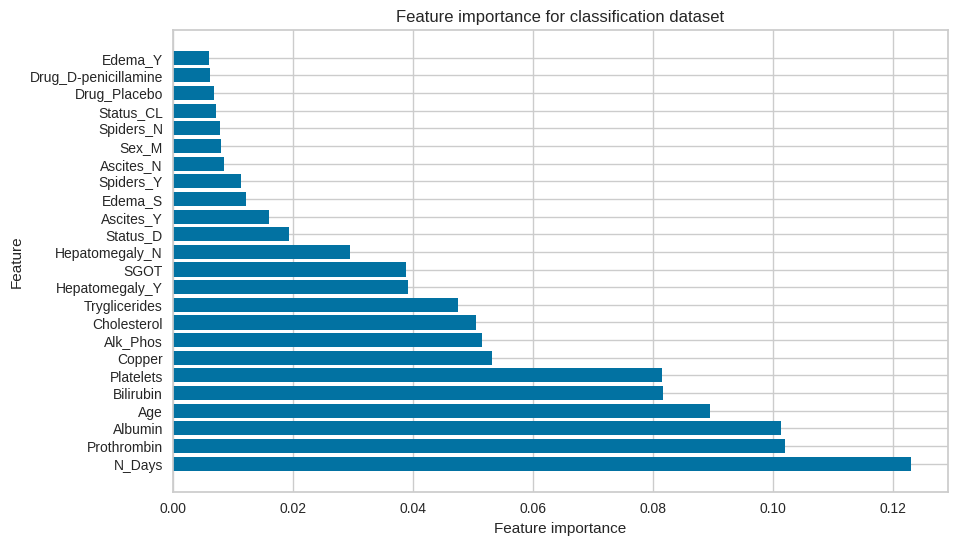

In [34]:
# Create a bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature importance for classification dataset")

In [35]:
X.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_M', 'Ascites_N',
       'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N',
       'Spiders_Y', 'Edema_S', 'Edema_Y', 'Status_CL', 'Status_D'],
      dtype='object')

In [36]:
X=X[['N_Days','Prothrombin', 'Albumin', 'Age', 'Platelets', 'Bilirubin', 'Cholesterol']]
df = pd.concat([X, y], axis=1)

##*Balance*

In [37]:
# Balance of the dataset
y.mean()

0.3444976076555024

##*Correlation Heatmap*

CORRELATION MATRIX
                N_Days  Prothrombin   Albumin       Age  Platelets  Bilirubin  \
N_Days       1.000000    -0.159209  0.443586 -0.121717   0.124329  -0.465394   
Prothrombin -0.159209     1.000000 -0.214551  0.125890  -0.230730   0.347443   
Albumin      0.443586    -0.214551  1.000000 -0.175524   0.132886  -0.353216   
Age         -0.121717     0.125890 -0.175524  1.000000  -0.156459  -0.018021   
Platelets    0.124329    -0.230730  0.132886 -0.156459   1.000000  -0.071012   
Bilirubin   -0.465394     0.347443 -0.353216 -0.018021  -0.071012   1.000000   
Cholesterol  0.090431    -0.015275  0.082617 -0.125447   0.134249   0.053968   
Stage       -0.331766     0.349420 -0.328912  0.205015  -0.217962   0.278363   

             Cholesterol     Stage  
N_Days          0.090431 -0.331766  
Prothrombin    -0.015275  0.349420  
Albumin         0.082617 -0.328912  
Age            -0.125447  0.205015  
Platelets       0.134249 -0.217962  
Bilirubin       0.053968  0.278363  


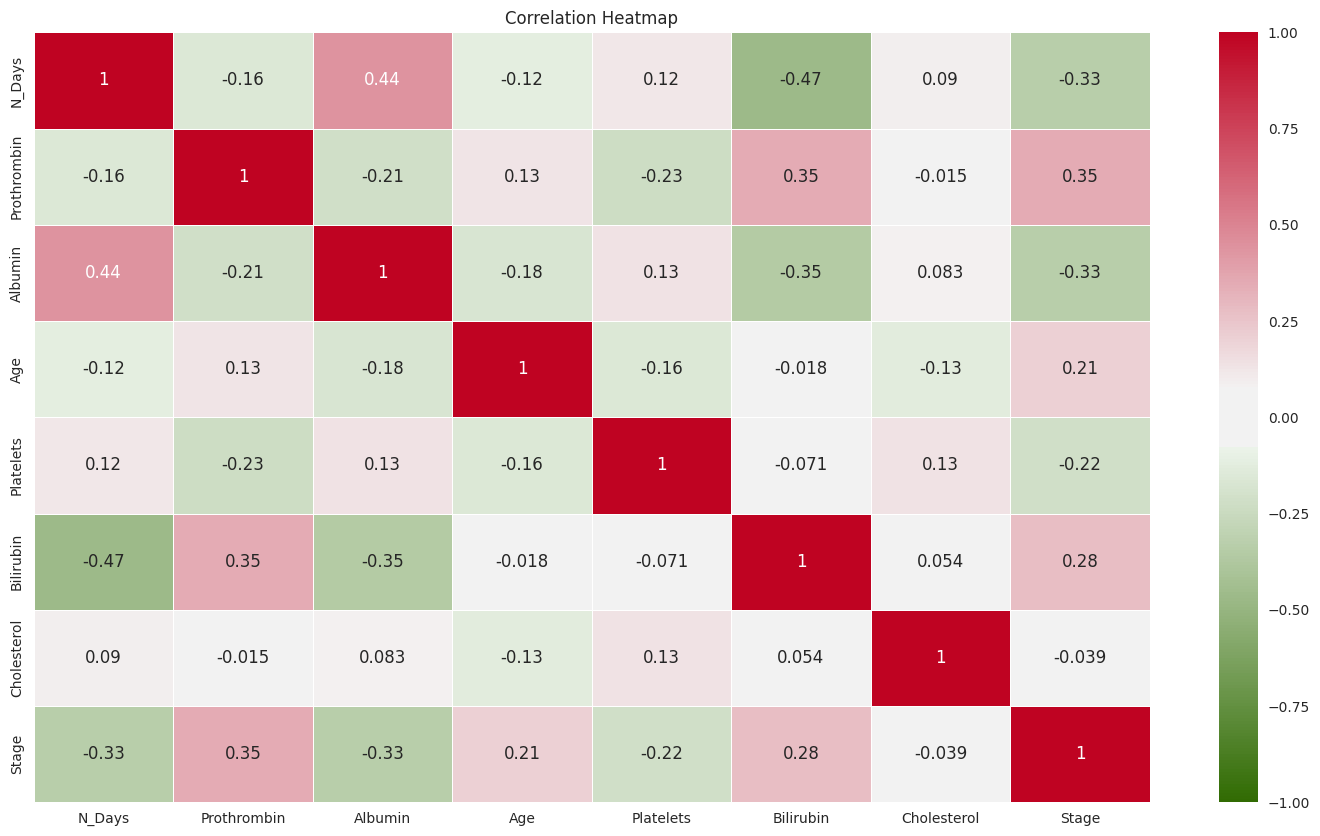

In [38]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr(method='pearson', min_periods=1))
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (18,10))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Correlation Heatmap")
plt.show()

#**Classifiers**
The M1 hackathon essentially starts here! Enjoy!
X and y are already set up and you can add and adjust the code for the four  four classifiers (decision tree, Pytorch Lightning neural network, lightGBM and PyCarey) below.

In [81]:
# Set up predictors (X) and target (y)
X = df.drop('Stage', axis=1)
y = df['Stage']
feature_names = X.columns

# Split the data into training and testing sets. This is  HOLDOUT SAMPLE.
HS_X_train, HS_X_test, HS_y_train, HS_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # COMMENT OUT THIS CODEBLOCK TO TURN OFF STANDARDIZATION OF THE HOLDOUT SAMPLE!!
# # Standardize features
#scaler = StandardScaler()
#HS_X_train = scaler.fit_transform(HS_X_train)
#HS_X_test = scaler.transform(HS_X_test)

# # COMMENT OUT THIS CODEBLOCK TO TURN OFF SMOTE OF THE HOLDOUT SAMPLE!!
# # Apply SMOTE to balance the training dataset
#smote = SMOTE(random_state=42)
#HS_X_train, HS_y_train = smote.fit_resample(HS_X_train, HS_y_train)

# Decision Tree Classifier

In [82]:
# # COMMENT OUT "('scaler', StandardScaler())," TO TURN OFF STANDARDIZATION!!
# # COMMENT OUT "('smote', SMOTE(random_state=42))," TO TURN OFF SMOTE!!
# Create a pipeline that includes scaling, balancing with SMOTE, and a decision tree classifier
pipeline = imbpipeline([
    #('scaler', StandardScaler()),
    #('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# # SET cv=None to TURN OFF CROSS-VALIDATION!!
# Perform cross-validation on the full dataset
scores = cross_val_score(pipeline, X, y, cv=None, scoring='accuracy')
print(f"Cross-validation scores: {scores.mean()}")

# Fit the pipeline on the HOLD OUT training set and predict on the HOLDOUT test set
pipeline.fit(HS_X_train, HS_y_train)
y_pred = pipeline.predict(HS_X_test)

# Evaluate the predictions
accuracy = accuracy_score(HS_y_test, y_pred)
conf_matrix = confusion_matrix(HS_y_test, y_pred)

print(f"Holdout Sample Test Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Cross-validation scores: 0.6912507171543316
Holdout Sample Test Accuracy: 0.5833333333333334
Confusion Matrix:
[[38 15]
 [20 11]]


# PyTorch Lightning Classifier

In [83]:
if isinstance(HS_X_train, pd.DataFrame):
        HS_X_train = HS_X_train.values
if isinstance(HS_y_train, pd.DataFrame):
        HS_y_train = HS_y_train.values
if isinstance(HS_y_train, pd.Series):
        HS_y_train = HS_y_train.values
if isinstance(HS_X_test, pd.DataFrame):
        HS_X_test = HS_X_test.values
if isinstance(HS_y_test, pd.DataFrame):
        HS_y_test = HS_y_test.values
if isinstance(HS_y_test, pd.Series):
        HS_y_test = HS_y_test.values

class Cirrhosis_Dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = Cirrhosis_Dataset(HS_X_train, HS_y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class CirrhosisModel(LightningModule):
    def __init__(self):
        super(CirrhosisModel, self).__init__()
        self.fc1 = nn.Linear(HS_X_train.shape[1], 20)  # Assuming 5 input features
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.binary_cross_entropy(y_hat, y.view(-1, 1))
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

# Create the PyTorch Lightning model
model = CirrhosisModel()

# Train the model
trainer = Trainer(max_epochs=100)
trainer.fit(model, train_loader)

class TestDataset(Dataset):
    def __init__(self, X):
        self.X = torch.tensor(X, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx]

test_dataset = TestDataset(HS_X_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Function to predict test data
def predict(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    with torch.no_grad():
        for batch in dataloader:
            batch = batch[0] if isinstance(batch, list) else batch
            preds = model(batch).squeeze()
            preds = torch.round(preds)  # Convert probabilities to class labels (0 or 1)
            predictions.extend(preds.cpu().numpy())
    return np.array(predictions)

# Predict the test data
y_pred = predict(model, test_loader)

# Calculate the confusion matrix and accuracy
conf_matrix = confusion_matrix(HS_y_test, y_pred)
accuracy = accuracy_score(HS_y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nHoldout Sample Test Accuracy:", accuracy)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 160   
1 | fc2  | Linear | 21    
--------------------------------
181       Trainable params
0         Non-trainable params
181       Total params
0.001     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


Confusion Matrix:
[[ 0 53]
 [ 0 31]]

Holdout Sample Test Accuracy: 0.36904761904761907


# Light GBM Classifier

In [84]:
# # COMMENT OUT "('scaler', StandardScaler())," TO TURN OFF STANDARDIZATION!!
# # COMMENT OUT "('smote', SMOTE(random_state=42))," TO TURN OFF SMOTE!!
# Create a pipeline that includes scaling, balancing with SMOTE, and a decision tree classifier
pipeline = imbpipeline([
    #('scaler', StandardScaler()),
    #('smote', SMOTE(random_state=42)),
    ('classifier', lgb.LGBMClassifier(random_state=42,verbose=-1))
])

# # SET cv=None to TURN OFF CROSS-VALIDATION!!
# Perform cross-validation on the full dataset
scores = cross_val_score(pipeline, X, y, cv=None, scoring='accuracy')
print(f"Cross-validation scores: {scores.mean()}")

# Fit the pipeline on the HOLD OUT training set and predict on the HOLDOUT test set
pipeline.fit(HS_X_train, HS_y_train)
y_pred = pipeline.predict(HS_X_test)

# Evaluate the predictions
accuracy = accuracy_score(HS_y_test, y_pred)
conf_matrix = confusion_matrix(HS_y_test, y_pred)

print(f"Holdout Sample Test Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Cross-validation scores: 0.712794033275961
Holdout Sample Test Accuracy: 0.7023809523809523
Confusion Matrix:
[[42 11]
 [14 17]]


# PyCaret Low-Code Classifier

In [85]:
# ADJUST normalize, fix_imbalance AND fold TO TURN STANDARDIZATION, BALANCE AND CROSS-VALIDATION ON/OFF
# THE MINIMUM VALUE OF fold is 2 (THERE IS NO WAY TO USE THIS CODE TO EVALUATE PYCARET ON THE HOLDOUT SAMPLE ONLY)
clf_setup = setup(data=df,
                  train_size = 0.8,
                  target='Stage',
                  #normalize=True,
                  # fix_imbalance=True,
                  session_id=42, fold=2)


# Compare models to choose the best one
best_model = compare_models()

# Create a model; here, we use the best model found by compare_models
# For example, if Logistic Regression was the best: model = create_model('lr')
model = create_model(best_model)

# Tune the model for better performance (optional)
tuned_model = tune_model(model)

# Finalize the model (trains on the whole dataset)
final_model = finalize_model(tuned_model)

# Predict on the test set
predict_model(final_model);

# Display the accuracy and confusion matrix
evaluate_model(final_model)

,Description,Value
0,Session id,42
1,Target,Stage
2,Target type,Binary
3,Original data shape,"(418, 8)"
4,Transformed data shape,"(418, 8)"
5,Transformed train set shape,"(334, 8)"
6,Transformed test set shape,"(84, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7425,0.7747,0.5050,0.6657,0.5743,0.3949,0.4025,0.1600
nb,Naive Bayes,0.7395,0.7836,0.5485,0.6402,0.5905,0.4016,0.4042,0.0400
lda,Linear Discriminant Analysis,0.7395,0.7766,0.5139,0.6514,0.5742,0.3911,0.3966,0.0400
ridge,Ridge Classifier,0.7305,0.0000,0.4790,0.6459,0.5500,0.3640,0.3721,0.0600
ada,Ada Boost Classifier,0.7275,0.7624,0.5921,0.6041,0.5975,0.3919,0.3923,0.1350
qda,Quadratic Discriminant Analysis,0.7246,0.7502,0.4701,0.6346,0.5400,0.3498,0.3577,0.0350
rf,Random Forest Classifier,0.7216,0.7808,0.4525,0.6333,0.5274,0.3381,0.3478,0.2200
gbc,Gradient Boosting Classifier,0.7216,0.7584,0.5218,0.6125,0.5634,0.3610,0.3635,0.1500
et,Extra Trees Classifier,0.7216,0.7696,0.4701,0.6261,0.5362,0.3437,0.3510,0.1850
lightgbm,Light Gradient Boosting Machine,0.7186,0.7666,0.5130,0.6091,0.5567,0.3528,0.3558,0.5350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7904,0.8159,0.5789,0.7500,0.6535,0.5068,0.5155
1,0.6946,0.7335,0.4310,0.5814,0.4950,0.2830,0.2895
Mean,0.7425,0.7747,0.5050,0.6657,0.5743,0.3949,0.4025
Std,0.0479,0.0412,0.0740,0.0843,0.0792,0.1119,0.1130


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7904,0.8148,0.5789,0.7500,0.6535,0.5068,0.5155
1,0.6946,0.7324,0.4310,0.5814,0.4950,0.2830,0.2895
Mean,0.7425,0.7736,0.5050,0.6657,0.5743,0.3949,0.4025
Std,0.0479,0.0412,0.0740,0.0843,0.0792,0.1119,0.1130


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7500,0.7774,0.4483,0.7222,0.5532,0.3926,0.4141


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Conclusion


# Overall Conclusions
Overall, the best classifier appears to be the PyCaret Low-Code Classifier since it is reporting the highest accuracy for almost all of the parts. However, in terms of adding in Standardization, the PyCaret Low-Code Classifier does worse, the best model for that is the Light GBM Classifier.




|**Regressor** |       Accuracy      | Confusion Matrix |
|:----------------------|:--------------:|:--------------:|
|Decision Tree Base | 0.691 | $$\begin{bmatrix} 38 & 15 \\ 20 & 11\\\end{bmatrix}$$ |
|Decision Tree Scaled   | 0.691 | $$\begin{bmatrix} 38 & 15 \\ 20 & 11\\\end{bmatrix}$$ |
|Decision Tree Balanced | 0.645 | $$\begin{bmatrix} 36 & 17 \\ 16 & 15\\\end{bmatrix}$$ |
|Decision Tree Comprehensive | 0.67 | $$\begin{bmatrix} 36 & 17 \\ 13 & 18\\\end{bmatrix}$$ |
|PyTorch Lightning Base | 0.36 | $$\begin{bmatrix} 0 & 53 \\ 0 & 31\\\end{bmatrix}$$ |
|PyTorch Lightning Scaled   | 0.63 | $$\begin{bmatrix} 45 & 8 \\ 17 & 14\\\end{bmatrix}$$ |
|PyTorch Lightning Balanced | 0.63 | $$\begin{bmatrix} 53 & 0 \\ 31 & 0\\\end{bmatrix}$$ |
|PyTorch Lightning Comprehensive | 0.666 | $$\begin{bmatrix} 38 & 15 \\ 13 & 18\\\end{bmatrix}$$ |
|LightGBM Base | 0.71 | $$\begin{bmatrix} 42 & 11 \\ 14 & 17\\\end{bmatrix}$$ |
|LightGBM Scaled   | 0.71 | $$\begin{bmatrix} 43 & 10 \\ 13 & 18\\\end{bmatrix}$$ |
|LightGBM Balanced | 0.714 | $$\begin{bmatrix} 42 & 11 \\ 13 & 18\\\end{bmatrix}$$ |
|LightGBM Comprehensive | 0.702 | $$\begin{bmatrix} 40 & 13 \\ 12 & 19\\\end{bmatrix}$$ |
|PyCaret Base | 0.75 | $$\begin{bmatrix} 50 & 5 \\ 16 & 13\\\end{bmatrix}$$ |
|PyCaret Scaled   | 0.69 | $$\begin{bmatrix} 42 & 13 \\ 13 & 16\\\end{bmatrix}$$ |
|PyCaret Balanced   | 0.72 | $$\begin{bmatrix} 43 & 12 \\ 9 & 20 \\\end{bmatrix}$$ |
|PyCaret Comprehensive | 0.72 | $$\begin{bmatrix} 42 & 13 \\ 10 & 19\\\end{bmatrix}$$ |